In [1]:
import numpy as np
import matplotlib.pyplot as plt
from Helper_functions import *
from numpy import linalg as la
import matplotlib.pyplot as plt
import cvxpy as cp

/var/folders/0v/yyxwg9ld1z95p55ths3jt4bw0000gn/T/ipykernel_4521/4028928592.py:24: RuntimeWarning: overflow encountered in power
  p = 1-np.power(np.exp(1)*m,2*n)*np.sqrt(2*n-1)/(np.power(4*n,2*n-1)) * np.exp(-np.power(np.sin(phi),(2*n))*(m-n)/(np.sqrt(16*n)))*np.cos(phi)-np.exp(-((m-4*n+1)**2)/(2*m-2))


[0.00052943 0.00231637 0.00421635 0.00731452 0.01123892 0.01765361
 0.01899123 0.02910744 0.0293351  0.03789744]
[0.   0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09]


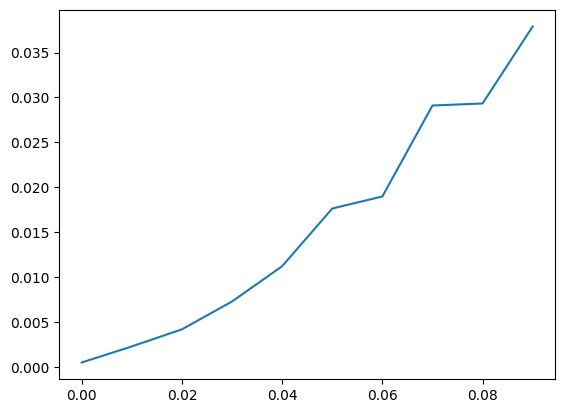

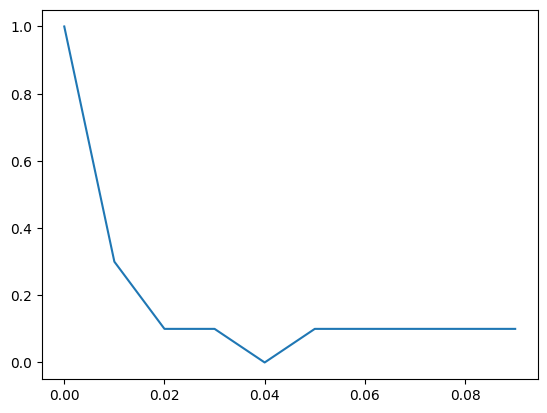

In [127]:
n = 100
m = 500
sigma = np.arange(0.0,0.1,0.01)# np.append(np.arange(0, 0.1, 0.01),(np.arange(0.1, 1, 0.1)))

errors = np.zeros(len(sigma))
success = np.zeros(len(sigma)) # less than 10^-5
success_7 = np.zeros(len(sigma)) # error bound in thm 7
p_7 = np.zeros(len(sigma)) # probability of success in thm 7

repeats = 10


for i in range(len(sigma)):
    for _ in range(repeats):
        noise = np.random.normal(0, sigma[i], m)
        Data = GaussData(n,m,True)
        bn = Data.b + np.abs(noise)

        s2 = np.min((bn**2)/(Data.b**2))
        r = 1/np.sqrt(s2)*max(Data.b**2 -s2*Data.b + noise/Data.b)
        epsilon = r/2 + 10e-5
        phi = np.arccos(r/(2*epsilon))-25/180*np.pi 
        suc = epsilon/(la.norm(Data.x0))+(1-np.sqrt(s2))
        p = 1-np.power(np.exp(1)*m,2*n)*np.sqrt(2*n-1)/(np.power(4*n,2*n-1)) * np.exp(-np.power(np.sin(phi),(2*n))*(m-n)/(np.sqrt(16*n)))*np.cos(phi)-np.exp(-((m-4*n+1)**2)/(2*m-2))
        
        p_7[i]+=p
        
        xhat = init_angle(Data.x0, 25/180*np.pi)

        xsol = PhaseMax(Data.A, bn, xhat,isComplex =True, verbose=False)
        alpha = inp(Data.x0,xsol)/(inp(xsol,xsol))
        sol = alpha * xsol
        error = la.norm(Data.x0-sol)**2/la.norm(Data.x0)**2
        errors[i] += error
        if error < 10e-5:
            success[i] += 1
        if la.norm(Data.x0-sol) < epsilon + (1-np.sqrt(s2))*la.norm(Data.x0):
            success_7[i] += 1

    
print(errors/repeats)
print(sigma)
plt.plot(sigma, errors/repeats)
plt.show()

plt.plot(sigma, success_7/repeats)
plt.plot(sigma, p_7/repeats)
plt.show()

In [128]:
print(success_7)
print(p_7)
print(success)

[10.  3.  1.  1.  0.  1.  1.  1.  1.  1.]
[-inf -inf -inf -inf -inf -inf -inf -inf -inf -inf]
[6. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
